## <center>Pandas Tutorial </center>
 
This notebooks covers the following :

1. Method Chaining
2. Plotting
3. Filtering
4. Handling Missing Values & NaN assignment
5. Grouping
6. Pivoting

In [149]:
# Importing libraries
import os
import pandas as pd
import matplotlib
import numpy as np

%matplotlib inline

In [151]:
# Changing the directory path
os.chdir("/Users/pavitragajanana/My Files/Development/2. Data Files/")
os.getcwd()

'/Users/pavitragajanana/development/2. Data Files'

In [150]:
# Lists all the available files in the current working directory
%ls

Alternative Fuel Stations.csv
Alternative Fuel Vehicles.csv
BorderCrossingEntryData.csv
Credit_Ratings_Fitch.csv
CrudeOil_Annual_Cushing.csv
CrudeOil_Daily_Cushing_OK_WTI_Spot_Price_FOB.csv
CrudeOil_Daily_Europe_Brent_Spot_Price_FOB.csv
CrudeOil_Monthly_Cushing_OK_WTI_Spot_Price_FOB.csv
CrudeOil_Monthly_Dubai Crude_USD.csv
CrudeOil_Monthly_Europe_Brent_Spot_Price_FOB.csv
Fitch-ratings-history.csv
FossilFuelEnergyConsumption.csv
LightDutyVehicles.csv
PeriodicTable.csv
TempVehicles.csv
US-States.csv
USDINRExchangeRate.csv*
airline_delay.csv
all-vehicles-model.csv
bank-data.csv
banklist.csv
euro-exchange-rates.csv
ntsb-aviation-accident-dataset.csv
tao-all2.dat.gz
vehicles.csv


> ### Formatting the datafiles

#### Vehicles Dataset
<a id='vehicles_data'></a> 

In [245]:
# Loading vehicles data over the years using read_csv
vehicles = pd.read_csv("vehicles.csv",
                        sep=',', # To be mentioned, when ',' is not the separator
                        delimiter=None, 
                        header='infer', 
                        names=None, # List of names can be passed 
                        index_col=None, # Mentioned column will be set as row index
                        usecols=None, # List of columns to be read
                        squeeze=False, # True if your dataset has a single column and you want it to be read as a series
                        prefix=None,  # When data doesnt have headers, pandas assigns numbers to col names and that can be prefixed
                        mangle_dupe_cols=True, # If data has duplicate names in columns, such can be handled
                       
                        dtype=None, 
                        engine=None, # Used to specify the parsing engine
                        converters=None, # Use converters to convert values in certain columns, using a dict of functions
                        true_values=None, # Interprets the list of values as True
                        false_values=None, # Interprets the list of values as False
                        
                        skipinitialspace=False, # Trims leading or trailing spaces in a field
                        skiprows=None, # When integer, excludes skips n rows from begining; when list, skips the mentioned rows
                        skipfooter=0, # Skips last n rows
                        nrows=None, # Reads n rows
                       
                       # By default, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’ are considered NaN
                        na_values=[""], # Specified strings additional to the ones mentioned above will be considered as NaN, provided keep_default_na is True
                        keep_default_na=False, # Switch this to False if you want to omit the default set of strings that will be considered as NaN 
                        na_filter=True, # For a large dataset, set na_filter as False if you are sure that data does not have missing values to improve speed
                       
                        verbose=False, # Setting this to True displays additional information
                        skip_blank_lines=True, # Setting this to False inserts NaN for all na values
                        parse_dates=False, # [1,2,3] will be considered datetime individually; [[1,2,3]] combined will be considered datetime
                        infer_datetime_format=False, # set infer_datetime_format to True and parse_dates to a value will result in increasing parsing speed of that column by 10 times
                        keep_date_col=False, # To retain the combined and the original date columns when a set of columns are combined to form a new datetime column
                        date_parser=None, # Allows to add a function to parse the datetime in a specified format
                        dayfirst=False,  # Enables to indicate that day comes first in your column 
                        cache_dates=True, 
                        iterator=False, # Setting this to True will convert it into a file reader and df.get_chunk(n) can be used to retrieve values from the iterator
                        chunksize=None,
                        compression='infer', # will read compressed files
                       
                        thousands=None,
                        decimal=b'.',
                        lineterminator=None,
                        
                        quotechar='"',
                        quoting=0,
                        doublequote=True,
                        escapechar=None,
                        comment=None,
                        encoding=None,
                        dialect=None,
                        error_bad_lines=True,
                        warn_bad_lines=True,
                        delim_whitespace=False,
                        
                        low_memory=False,
                        memory_map=False,
                        float_precision=None,
                       )


# Formatting column names as per PEP8
vehicles.columns = [x.strip() for x in vehicles.columns]
vehicles.columns = [x.replace('..','_') for x in vehicles.columns]
vehicles.columns = [x.replace('.','_') for x in vehicles.columns]

# vehicles.dtypes

#### Crude Oil Prices Dataset 
<a id='crude_oil'></a> 

In [184]:
# Lets consider Crude oil daily prices
crude_oildata = pd.read_csv("CrudeOil_Daily_Cushing_OK_WTI_Spot_Price_FOB.csv",
                            low_memory=False,
                            keep_default_na=False,
                            parse_dates=[0])

crude_oildata.dtypes

Day             datetime64[ns]
WTISpotPrice           float64
dtype: object

#### El-Nino Dataset 
<a id='nino'></a> 

In [209]:
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')

nino = pd.read_csv('tao-all2.dat.gz', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])

nino.columns = [x.replace('.', '_').replace(' ', '_') for x in nino.columns]
nino['air_temp_F'] = nino.air_temp_ * 9/5 + 32
wind_cols = [x for x in nino.columns if x.endswith('winds')]
for c in wind_cols:
    nino['{}_mph'.format(c)] = nino[c] * 2.237
pd.to_datetime(nino.date, format='%y%m%d')
nino = nino.drop('obs', axis=1)

> ### Formatting dtypes of columns 

In [177]:
print(f"Previous dtype of Epa_Range_For_Fuel_Type2 :{vehicles.dtypes.Epa_Range_For_Fuel_Type2}")

# The Epa_Range_For_Fuel_Type2 consists of / and - to show range 
vehicles.Epa_Range_For_Fuel_Type2 = pd.to_numeric(vehicles.Epa_Range_For_Fuel_Type2.replace({'[\/\-][0-9].*':''},regex=True))


print(f"\nThe dtype of Epa_Range_For_Fuel_Type2 :{vehicles.dtypes.Epa_Range_For_Fuel_Type2}")
vehicles.dtypes.Epa_Range_For_Fuel_Type2

Previous dtype of Epa_Range_For_Fuel_Type2 :object

The dtype of Epa_Range_For_Fuel_Type2 :float64


dtype('float64')

In [247]:

print(f"Previous dtype of Epa_Range_For_Fuel_Type2 :{vehicles.dtypes.Epa_Range_For_Fuel_Type2}")

# An
def clean_columns(col):
    return col.replace('..','').replace(".","_")

# Using method chaining
(vehicles
 .rename(columns=clean_columns)
 .assign(Epa_Range_For_Fuel_Type2 =lambda df_ : pd.to_numeric(df_.Epa_Range_For_Fuel_Type2.replace({'[\/\-][0-9].*':''},regex=True)))
 .dtypes
 .Epa_Range_For_Fuel_Type2
)


dtype('float64')

> ####  Basic Statistics

In [231]:
vehicles.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Annual_Petroleum_Consumption_For_Fuel_Type1,41836.0,17.245066,4.624669,0.06,14.33087,16.4805,19.388824,47.087143
Annual_Petroleum_Consumption_For_Fuel_Type2,41836.0,0.220925,1.141343,0.00,0.00000,0.0000,0.000000,18.311667
Time_to_charge_at_120V,41836.0,0.000000,0.000000,0.00,0.00000,0.0000,0.000000,0.000000
Time_to_charge_at_240V,41836.0,0.046794,0.612551,0.00,0.00000,0.0000,0.000000,13.000000
City_Mpg_For_Fuel_Type1,41836.0,18.421360,7.973537,6.00,15.00000,17.0000,21.000000,150.000000


In [93]:
# To view non-numeric data pass include="all"
vehicles.describe(include="all").T.head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Annual_Petroleum_Consumption_For_Fuel_Type1,41836,NaN,NaN,NaN,17.2451,4.62467,0.06,14.3309,16.4805,19.3888,47.0871
Annual_Petroleum_Consumption_For_Fuel_Type2,41836,NaN,NaN,NaN,0.220925,1.14134,0,0,0,0,18.3117
Time_to_charge_at_120V,41836,NaN,NaN,NaN,0,0,0,0,0,0,0
Time_to_charge_at_240V,41836,NaN,NaN,NaN,0.0467939,0.612551,0,0,0,0,13
City_Mpg_For_Fuel_Type1,41836,NaN,NaN,NaN,18.4214,7.97354,6,15,17,21,150


In [94]:
# Properties (hasnans,is_monotonic,is_unique)
vehicles.City_Mpg_For_Fuel_Type1.max()
# Returns numpy.int64

150

In [95]:
# Dataframe methods
vehicles.max().head()
# Returns pandas.core.series.Series

Annual_Petroleum_Consumption_For_Fuel_Type1    47.0871
Annual_Petroleum_Consumption_For_Fuel_Type2    18.3117
Time_to_charge_at_120V                               0
Time_to_charge_at_240V                              13
City_Mpg_For_Fuel_Type1                            150
dtype: object

In [11]:
# gives the 99th percentile
vehicles.City_Mpg_For_Fuel_Type1.quantile(.99)

40.0

In [12]:
vehicles.City_Mpg_For_Fuel_Type1.quantile([0.1,0.5,0.8])

0.1    13.0
0.5    17.0
0.8    21.0
Name: City_Mpg_For_Fuel_Type1, dtype: float64

In [13]:
# needs to be used without a parenthesis
vehicles.City_Mpg_For_Fuel_Type1.hasnans

False

In [14]:
vehicles.City_gasoline_consumption.corr(vehicles.City_Mpg_For_Fuel_Type1)

0.004496685253484882

In [15]:
vehicles.City_gasoline_consumption.corr(vehicles.City_Mpg_For_Fuel_Type1, method = "spearman")

0.03217187426177383

> ### Plotting

    (Dataset : vehicles for Basic Plotting
               airline delay for 

(30, 300)

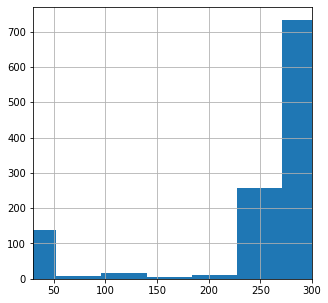

In [96]:
ax = vehicles.Epa_Range_For_Fuel_Type2.hist(figsize = (5,5))
ax.set_xlim(30,300)

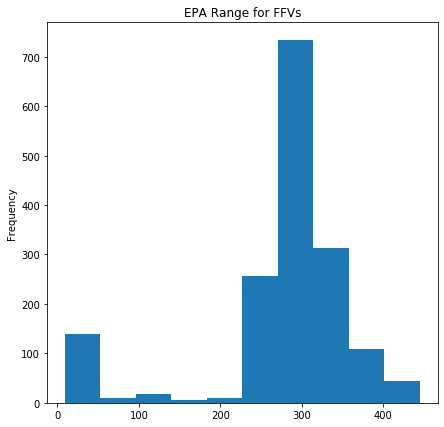

In [17]:
vehicles.Epa_Range_For_Fuel_Type2.plot(kind='hist',title="EPA Range for FFVs",figsize=(7,7))

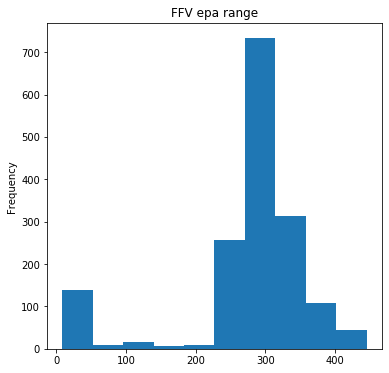

In [18]:
vehicles.Epa_Range_For_Fuel_Type2.plot.hist(title="FFV epa range",figsize=(6,6))

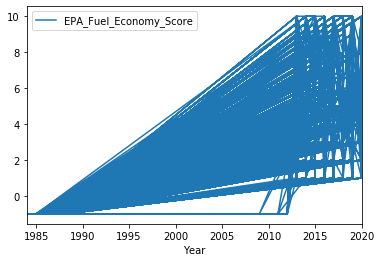

In [19]:
vehicles.plot(y="EPA_Fuel_Economy_Score",x="Year")

In [20]:
airline_delay = pd.read_csv("airline_delay.csv", na_values=['(NA)']).fillna(0)
airline_delay.columns


Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

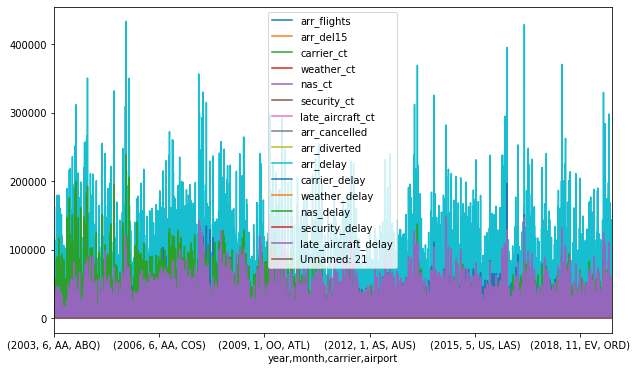

In [21]:
# Lets consider airline delay dataset
airline_delay = pd.read_csv("airline_delay.csv", na_values=['(NA)']).fillna(0)

def clean_columns(col):
    return col.lstrip()

(airline_delay
 
# Cleaning up the column names
 .rename(columns=clean_columns)
# Setting multiple index
 .set_index(["year","month","carrier","airport"])
 .plot(figsize=(10,6))
 
)

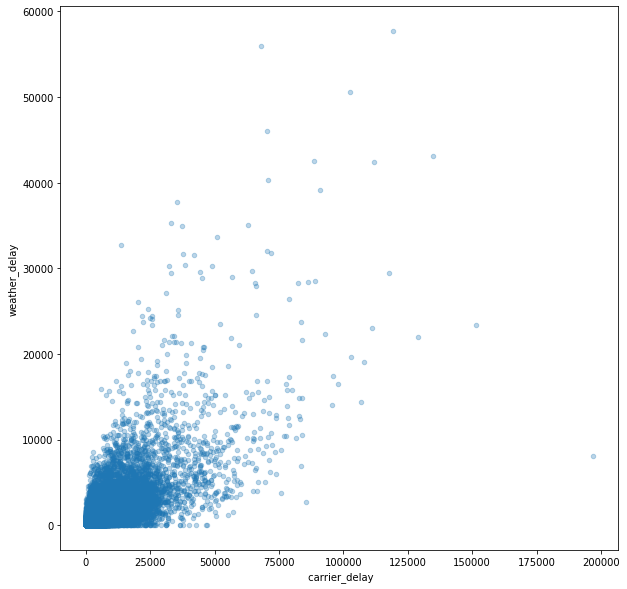

In [22]:
airline_delay.plot(y="weather_delay",x=" carrier_delay",kind="scatter",alpha=0.3,figsize=(10,10))

> ### Datetime Manipulation : Using the Pandas “Resample” Function

Load Crude Oil Prices dataset : Click on this hyperlink [crude_oil](#crude_oil)

    Resampling is necessary when manipulation of interval is required for the datetime recorded.
    Eg : Converting a daily data to monthly, quarterly, yearly and so on.

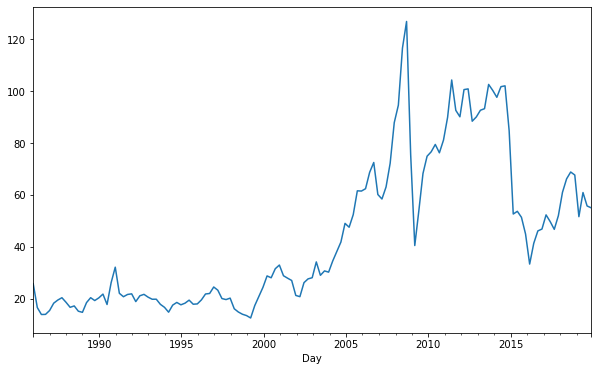

In [186]:
# Plotting a time series with resample(); Object must have a datetime-like index 
crude_oildata["Day"] = pd.to_datetime(crude_oildata["Day"])
crude_oildata.set_index("Day").WTISpotPrice.resample("13W").mean().plot(figsize=(10,6))

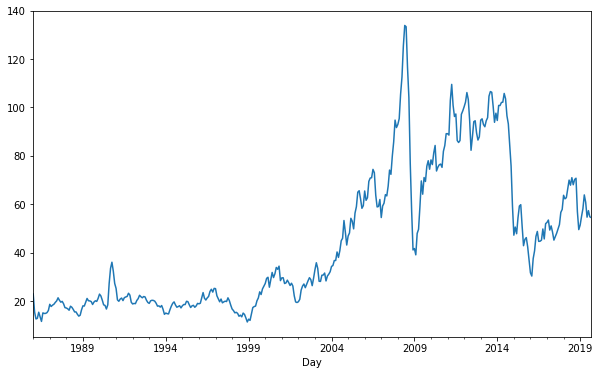

In [187]:
# Uses method chaining
# Uses resample with offset 'M' for monthly and 'Y' for yearly
wticushing_crudeoil_monthly = (crude_oildata

 .set_index("Day")
 .assign(WTISpotPrice = lambda df_ : (df_.round(2)))
 .WTISpotPrice
 .resample('M') 
# 'M' for Monthly prices; '2W' for 2 weeks; 'Y' for Yearly
 .mean().round(2)
 .plot(figsize=(10, 6))
)

wticushing_crudeoil_monthly

> # Plotting Assignment

    (Dataset : Alternate Fuel Stations)

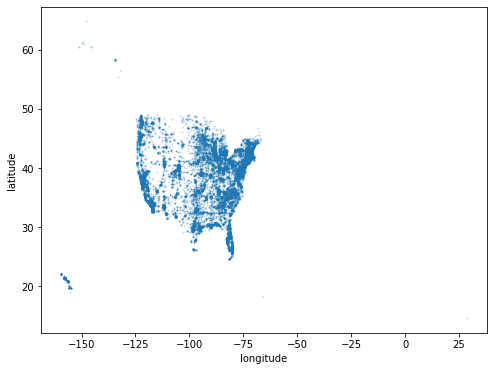

In [25]:
altfuelstations = pd.read_csv("Alternative Fuel Stations.csv",low_memory=False,keep_default_na=False)

altfuelstations.plot.scatter(x="longitude",y="latitude",alpha=0.2,figsize=(8,6),s=1)

> # Filtering
    Dataset : Vehicles

In [99]:
# Load csv file with keep_default_na is False, and na_values are not specified, no strings will be parsed as NaN
vehicles = pd.read_csv("vehicles.csv",low_memory=False)

# Formatting column names
vehicles.columns = [x.strip() for x in vehicles.columns]
vehicles.columns = [x.replace('..','_') for x in vehicles.columns]
vehicles.columns = [x.replace('.','_') for x in vehicles.columns]

In [159]:
vehicles.dtypes.head()

Annual_Petroleum_Consumption_For_Fuel_Type1    float64
Annual_Petroleum_Consumption_For_Fuel_Type2    float64
Time_to_charge_at_120V                           int64
Time_to_charge_at_240V                         float64
City_Mpg_For_Fuel_Type1                          int64
dtype: object

In [102]:
vehicles["Created_On"] = pd.to_datetime(vehicles["Created_On"])

# Creating masks 
created2019 = vehicles.Created_On.dt.year == 2019
created2018 = vehicles.Created_On.dt.year == 2018


/Users/pavitragajanana/development/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/pavitragajanana/development/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)

In [29]:
# Lists all the records that were created in 2018 and 2019
vehicles[created2018 | created2019].head()

,Annual_Petroleum_Consumption_For_Fuel_Type1,Annual_Petroleum_Consumption_For_Fuel_Type2,Time_to_charge_at_120V,Time_to_charge_at_240V,City_Mpg_For_Fuel_Type1,Unrounded_City_Mpg_For_Fuel_Type1,City_Mpg_For_Fuel_Type2,Unrounded_City_Mpg_For_Fuel_Type2,City_gasoline_consumption,City_electricity_consumption,...,MFR_Code,EV_Charger_Desc,EV_Alternate_Charger_Time_To_Charge,EV_Alternate_Charger_Desc,Created_On,Modified_On,Start_Stop,PHEV_City,PHEV_Highway,PHEV_Combined
32788,25.354615,0.0,0,0.0,11,10.7839,0,0.0,0.0,0.0,...,KGG,,0.0,,2018-01-03,Wed Jan 03 00:00:00 EST 2018,N,0,0,0
32789,25.354615,0.0,0,0.0,11,11.1215,0,0.0,0.0,0.0,...,PGN,,0.0,,2018-01-03,Wed Jan 03 00:00:00 EST 2018,N,0,0,0
32790,12.207778,0.0,0,0.0,24,23.8080,0,0.0,0.0,0.0,...,TYX,,0.0,,2018-01-03,Tue Feb 06 00:00:00 EST 2018,N,0,0,0
32791,13.733750,0.0,0,0.0,21,20.8906,0,0.0,0.0,0.0,...,TYX,,0.0,,2018-01-03,Tue Feb 06 00:00:00 EST 2018,N,0,0,0
32792,17.347895,0.0,0,0.0,16,16.0000,0,0.0,0.0,0.0,...,TYX,,0.0,,2018-01-03,Tue Feb 06 00:00:00 EST 2018,N,0,0,0


In [30]:
vehicles[(vehicles.Created_On.dt.year == 2019)|(vehicles.Created_On.dt.year == 2018)].head()   

,Annual_Petroleum_Consumption_For_Fuel_Type1,Annual_Petroleum_Consumption_For_Fuel_Type2,Time_to_charge_at_120V,Time_to_charge_at_240V,City_Mpg_For_Fuel_Type1,Unrounded_City_Mpg_For_Fuel_Type1,City_Mpg_For_Fuel_Type2,Unrounded_City_Mpg_For_Fuel_Type2,City_gasoline_consumption,City_electricity_consumption,...,MFR_Code,EV_Charger_Desc,EV_Alternate_Charger_Time_To_Charge,EV_Alternate_Charger_Desc,Created_On,Modified_On,Start_Stop,PHEV_City,PHEV_Highway,PHEV_Combined
32788,25.354615,0.0,0,0.0,11,10.7839,0,0.0,0.0,0.0,...,KGG,,0.0,,2018-01-03,Wed Jan 03 00:00:00 EST 2018,N,0,0,0
32789,25.354615,0.0,0,0.0,11,11.1215,0,0.0,0.0,0.0,...,PGN,,0.0,,2018-01-03,Wed Jan 03 00:00:00 EST 2018,N,0,0,0
32790,12.207778,0.0,0,0.0,24,23.8080,0,0.0,0.0,0.0,...,TYX,,0.0,,2018-01-03,Tue Feb 06 00:00:00 EST 2018,N,0,0,0
32791,13.733750,0.0,0,0.0,21,20.8906,0,0.0,0.0,0.0,...,TYX,,0.0,,2018-01-03,Tue Feb 06 00:00:00 EST 2018,N,0,0,0
32792,17.347895,0.0,0,0.0,16,16.0000,0,0.0,0.0,0.0,...,TYX,,0.0,,2018-01-03,Tue Feb 06 00:00:00 EST 2018,N,0,0,0


In [103]:
# Creating a mask for vehicles that includes All-Electric Vehicles, Hybrids and PHEVs 
ev = ((vehicles.Fuel_Type1 =="Electricity")&(vehicles.Fuel_Type1 ==""))\
     |(vehicles.Fuel_Type2 =="Electricity") 
    
pd.DataFrame(vehicles.loc[ev,[x for x in vehicles.columns if x in ['Make','Model','Year','Drive']]]).head()


,Drive,Make,Model,Year
23043,Front-Wheel Drive,Chevrolet,Volt,2011
23745,Front-Wheel Drive,Chevrolet,Volt,2012
24702,Front-Wheel Drive,Toyota,Prius Plug-in Hybrid,2012
24738,Rear-Wheel Drive,Fisker,Karma,2012
24891,Front-Wheel Drive,Chevrolet,Volt,2013


> ### Using loc

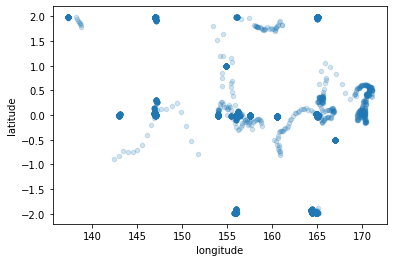

In [40]:
m80 = (nino.year_month_day.dt.year >=1980) & (nino.year_month_day.dt.year < 1990)
m90 = (nino.year_month_day.dt.year >=1990) & (nino.year_month_day.dt.year < 2000)
lon120 = nino.longitude > 120
lat0 = (nino.latitude < 2) & (nino.latitude>-2)
df80 = nino[m80 & lon120 & lat0]
df90 = nino.loc[m90 & lon120 & lat0]

df90.plot.scatter(y='latitude',x='longitude',alpha=0.2)

> ### Handling Missing Values

    1. # Default set to 60
       pd.options.display.max_rows
       
       # Adjust accordingly to display all the rows
       pd.set_option('display.max_rows',100)

> #### Using isna
Load vehicles dataset : Click on this hyperlink [vehicles_data](#vehicles_data)

In [161]:
# Checking for columns with missing data
vehicles.isna().any(axis=0)

# Checking for number of missing values in colu
vehicles.isna().sum()

# Rows with missing values other than those mentioned in na_values
vehicles[vehicles.isna().any(axis=1)].head()

,Annual_Petroleum_Consumption_For_Fuel_Type1,Annual_Petroleum_Consumption_For_Fuel_Type2,Time_to_charge_at_120V,Time_to_charge_at_240V,City_Mpg_For_Fuel_Type1,Unrounded_City_Mpg_For_Fuel_Type1,City_Mpg_For_Fuel_Type2,Unrounded_City_Mpg_For_Fuel_Type2,City_gasoline_consumption,City_electricity_consumption,...,MFR_Code,EV_Charger_Desc,EV_Alternate_Charger_Time_To_Charge,EV_Alternate_Charger_Desc,Created_On,Modified_On,Start_Stop,PHEV_City,PHEV_Highway,PHEV_Combined
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


> #### Using isnull

In [160]:
# Checking for columns with missing data
vehicles.isnull().any(axis=0)

# Checking for number of missing values in colu
vehicles.isna().sum()

# Rows with missing values other than those mentioned in na_values
vehicles[vehicles.isna().any(axis=1)].head()

,Annual_Petroleum_Consumption_For_Fuel_Type1,Annual_Petroleum_Consumption_For_Fuel_Type2,Time_to_charge_at_120V,Time_to_charge_at_240V,City_Mpg_For_Fuel_Type1,Unrounded_City_Mpg_For_Fuel_Type1,City_Mpg_For_Fuel_Type2,Unrounded_City_Mpg_For_Fuel_Type2,City_gasoline_consumption,City_electricity_consumption,...,MFR_Code,EV_Charger_Desc,EV_Alternate_Charger_Time_To_Charge,EV_Alternate_Charger_Desc,Created_On,Modified_On,Start_Stop,PHEV_City,PHEV_Highway,PHEV_Combined
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


In [115]:
pd.set_option('display.max_rows',100)

In [86]:
# Load csv file with keep_default_na is False, and na_values are not specified, no strings will be parsed as NaN
vehicles = pd.read_csv("vehicles.csv",low_memory=False,keep_default_na=False)

# Formatting column names
vehicles.columns = [x.strip() for x in vehicles.columns]
vehicles.columns = [x.replace('..','_') for x in vehicles.columns]
vehicles.columns = [x.replace('.','_') for x in vehicles.columns]

vehicles

,Annual_Petroleum_Consumption_For_Fuel_Type1,Annual_Petroleum_Consumption_For_Fuel_Type2,Time_to_charge_at_120V,Time_to_charge_at_240V,City_Mpg_For_Fuel_Type1,Unrounded_City_Mpg_For_Fuel_Type1,City_Mpg_For_Fuel_Type2,Unrounded_City_Mpg_For_Fuel_Type2,City_gasoline_consumption,City_electricity_consumption,...,MFR_Code,EV_Charger_Desc,EV_Alternate_Charger_Time_To_Charge,EV_Alternate_Charger_Desc,Created_On,Modified_On,Start_Stop,PHEV_City,PHEV_Highway,PHEV_Combined
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41831,14.982273,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
41832,14.330870,0.0,0,0.0,20,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
41833,15.695714,0.0,0,0.0,18,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
41834,15.695714,0.0,0,0.0,18,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


> NaN assignment

In [146]:
nino[nino.isna().any(axis=1)]
# nino[nino.isna().any(axis='columns')]

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
0,1980-03-07,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24,79.052,-15.2116,1.5659
1,1980-03-08,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97,78.188,-10.9613,2.4607
2,1980-03-09,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28,78.242,-10.0665,4.9214
3,1980-03-10,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31,78.026,-8.5006,4.2503
4,1980-03-11,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19,77.540,-9.3954,3.3555
...,...,...,...,...,...,...,...,...,...,...,...,...
177438,1996-09-12,960912,9.00,-140.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177606,1997-02-27,970227,9.00,-140.28,-8.0,-4.2,86.7,NaN,NaN,NaN,-17.8960,-9.3954
177655,1997-04-17,970417,9.00,-140.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177656,1997-04-18,970418,8.98,-140.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
nino.isna().any(axis=0)
# nino.isnull().sum() gives the number of missing values 

year_month_day    False
date              False
latitude          False
longitude         False
zon_winds          True
mer_winds          True
humidity           True
air_temp_          True
s_s_temp_          True
air_temp_F         True
zon_winds_mph      True
mer_winds_mph      True
dtype: bool

In [144]:
missing_zon = nino.isnull()
nino[missing_zon.zon_winds]

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
659,1982-12-20,821220,0.04,-109.22,NaN,NaN,NaN,27.01,27.60,80.618,NaN,NaN
660,1982-12-21,821221,0.04,-109.22,NaN,NaN,NaN,27.02,27.66,80.636,NaN,NaN
661,1982-12-22,821222,0.04,-109.22,NaN,NaN,NaN,27.24,27.76,81.032,NaN,NaN
662,1982-12-23,821223,0.04,-109.22,NaN,NaN,NaN,26.79,27.83,80.222,NaN,NaN
663,1982-12-24,821224,0.04,-109.22,NaN,NaN,NaN,27.08,27.93,80.744,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
177433,1996-09-07,960907,9.00,-140.26,NaN,NaN,NaN,27.64,28.22,81.752,NaN,NaN
177438,1996-09-12,960912,9.00,-140.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177655,1997-04-17,970417,9.00,-140.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177656,1997-04-18,970418,8.98,-140.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


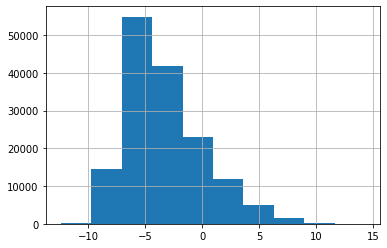

In [148]:
nino.zon_winds.hist()

> #### Grouping

1. Groupby a single column
2. Groupby multiple columns

    Please Note :
    
    1. 

> Load vehicles dataset : Click on this hyperlink [vehicles_data](#vehicles_data)

In [166]:
# Group by Drive and take mean of City mileage
vehicles.groupby('Drive').mean()['City_Mpg_For_Fuel_Type1']

Drive
2-Wheel Drive                 16.891519
4-Wheel Drive                 17.398734
4-Wheel or All-Wheel Drive    15.044675
All-Wheel Drive               20.227484
Front-Wheel Drive             22.002291
Part-time 4-Wheel Drive       15.746377
Rear-Wheel Drive              16.018787
Name: City_Mpg_For_Fuel_Type1, dtype: float64

> Load Crude Oil Prices dataset : Click on this hyperlink [crude_oil](#crude_oil)

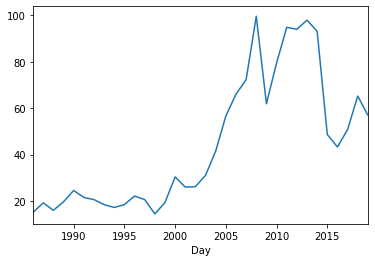

In [192]:
# Another example of grouping with crude oil dataset; 
crude_oildata.groupby(crude_oildata.Day.dt.year).mean()['WTISpotPrice'].round(2).plot()

In [202]:
# Lets try grouping by multiple columns with vehicles
vehicles.groupby([vehicles.Drive,vehicles.Cylinders]).mean()['City_Mpg_For_Fuel_Type1']

Drive                       Cylinders
2-Wheel Drive               4            20.208861
                            6            14.253333
                            8            12.945946
4-Wheel Drive               12           11.000000
                            4            21.473016
                            5            15.909091
                            6            17.904468
                            8            14.392491
                            NA           21.500000
4-Wheel or All-Wheel Drive  10           11.666667
                            12            9.403846
                            16            8.000000
                            3            25.545455
                            4            18.534856
                            5            16.041176
                            6            14.886579
                            8            12.388973
All-Wheel Drive             10           12.894737
                            12           11.

In [199]:
# Lets try grouping by multiple columns with a datetime column
crude_oildata.groupby([crude_oildata.Day.dt.year.rename('year'),crude_oildata.Day.dt.month]).mean()['WTISpotPrice'].round(2)

year  Day
1986  1      22.93
      2      15.45
      3      12.61
      4      12.84
      5      15.38
             ...  
2019  5      60.83
      6      54.66
      7      57.36
      8      54.81
      9      54.49
Name: WTISpotPrice, Length: 405, dtype: float64

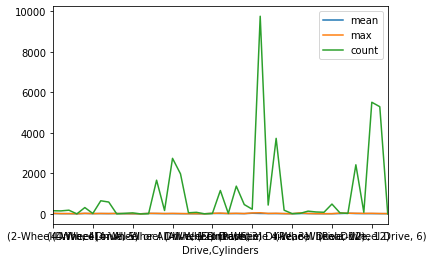

In [208]:
# Using method chaining 
# For every column we can aggregate mean max and count
(vehicles
 .groupby([vehicles.Drive,vehicles.Cylinders])
 .agg(['mean','max','count'])
 .City_Mpg_For_Fuel_Type1
 .plot()
)

#### Grouping assignment with nino dataset
> Load nino dataset : Click on this hyperlink [nino](#nino)

In [218]:
nino.dtypes

year_month_day    datetime64[ns]
date                       int64
latitude                 float64
longitude                float64
zon_winds                float64
mer_winds                float64
humidity                 float64
air_temp_                float64
s_s_temp_                float64
air_temp_F               float64
zon_winds_mph            float64
mer_winds_mph            float64
dtype: object

In [229]:
# Mean temperature for each year
(nino
 .groupby(nino.year_month_day.dt.year)
 .air_temp_
 .mean()
)

year_month_day
1980    22.774337
1981    22.454716
1982    24.640317
1983    25.320099
1984    23.810299
1985    24.913458
1986    26.217397
1987    27.098709
1988    25.203781
1989    26.062927
1990    26.664894
1991    27.043086
1992    27.097112
1993    27.112055
1994    27.058699
1995    26.814457
1996    26.633307
1997    27.571349
1998    27.805985
Name: air_temp_, dtype: float64

In [221]:
# Count of entries for each year
(nino
 .groupby(nino.year_month_day.dt.year)
 .count()
)

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
year_month_day,,,,,,,,,,,,
1980,166,166,166,166,166,166,0,166,158,166,166,166
1981,545,545,545,545,545,545,0,545,323,545,545,545
1982,505,505,505,505,493,493,0,505,431,505,493,493
1983,406,406,406,406,294,294,0,404,343,404,294,294
1984,947,947,947,947,885,885,0,903,694,903,885,885
1985,1684,1684,1684,1684,940,940,0,1420,1188,1420,940,940
1986,3780,3780,3780,3780,2669,2669,0,3158,2326,3158,2669,2669
1987,4688,4688,4688,4688,4432,4432,0,3989,3155,3989,4432,4432
1988,6136,6136,6136,6136,5392,5393,0,5329,4916,5329,5392,5393


In [225]:
# Max temperature for each year
nino.groupby(nino.year_month_day.dt.year).max()['air_temp_F']

year_month_day
1980    81.104
1981    80.960
1982    81.500
1983    84.848
1984    81.770
1985    86.072
1986    86.936
1987    87.224
1988    87.548
1989    86.774
1990    86.162
1991    86.036
1992    88.664
1993    87.620
1994    86.558
1995    86.270
1996    86.342
1997    86.234
1998    88.988
Name: air_temp_F, dtype: float64

> ## Pivoting

In [272]:
(vehicles
 .pivot_table(index =[vehicles.Drive,vehicles.Cylinders],
                     aggfunc=[np.max],
                     values=["City_Mpg_For_Fuel_Type1"])
 .unstack(1) # Unstack Cylinders
 #.plot(cmap="viridis",figsize=(14,10))
)

amax                         \
                           City_Mpg_For_Fuel_Type1                          
Cylinders                                       10    12   16     2     3   
Drive                                                                       
2-Wheel Drive                                  NaN   NaN  NaN   NaN   NaN   
4-Wheel Drive                                  NaN  11.0  NaN   NaN   NaN   
4-Wheel or All-Wheel Drive                    15.0  13.0  8.0   NaN  27.0   
All-Wheel Drive                               14.0  14.0  9.0   NaN  28.0   
Front-Wheel Drive                              NaN   NaN  NaN   NaN  49.0   
Part-time 4-Wheel Drive                        NaN  12.0  NaN   NaN   NaN   
Rear-Wheel Drive                              14.0  15.0  NaN  41.0  34.0   

                                                          
                                                          
Cylinders                      4     5     6     8    NA  
Drive                                                     
2-Wheel Drive               31.0   NaN  18.0  18.0   NaN  
4-Wheel Drive               30.0  17.0  23.0  21.0  22.0  
4-Wheel or All-Wheel Drive  29.0  18.0  27.0  20.0   NaN  
All-Wheel Drive             41.0  20.0  31.0  20.0   NaN  
Front-Wheel Drive           58.0  24.0  32.0  18.0   NaN  
Part-time 4-Wheel Drive     52.0   NaN  23.0  16.0   NaN  
Rear-Wheel Drive            33.0  26.0  29.0  21.0  15.0

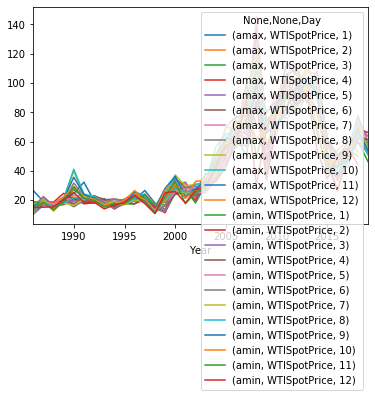

In [277]:
(crude_oildata
 
 .pivot_table(index=[crude_oildata.Day.dt.year.rename("Year"),crude_oildata.Day.dt.month],
             aggfunc=[np.max,np.min],
             values=["WTISpotPrice"])
 .unstack(1)
 .plot()
)

> Pivoting Assignment : El-Nino dataset

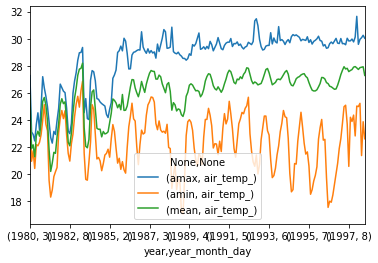

In [283]:
(nino
 .pivot_table(index=[nino.year_month_day.dt.year.rename('year'),nino.year_month_day.dt.month],
              aggfunc=[np.max,np.min,np.mean],
              values=["air_temp_"])
 .plot()
)

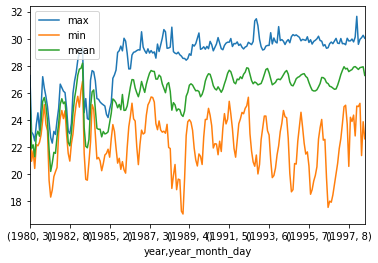

In [285]:
(nino
 .groupby([nino.year_month_day.dt.year.rename('year'),nino.year_month_day.dt.month])
 .air_temp_
 .agg(["max","min","mean"])
 .plot()
)